# Libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load Data

In [6]:
df = pd.read_csv('../data/preprocessed_data.csv')
df.head()

,category,매니저,신입,전략,개발자,디자이너,웹,마,콘텐츠,컨텐츠,...,senior,digital,pm,machine,uiux,marketer,app,graphic,ad,coupang
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(7632, 106)

# X, y Split

In [8]:
X = df.drop('category', axis=1)
y = df[['category']]
print(X.shape, y.shape)

(7632, 105) (7632, 1)


# Class distribution

/home/ubuntu/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


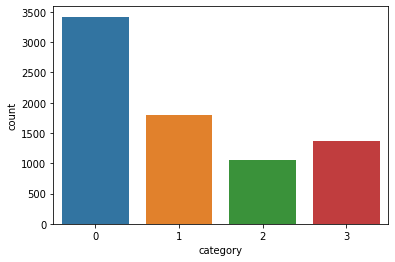

In [11]:
_ = sns.countplot(y['category'])

# Train/Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((5724, 105), (5724, 1), (1908, 105), (1908, 1))

# Fit Model

In [26]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

In [27]:
params = {
    'max_depth': 6,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 4,
#    'n_gpus' : 0
}

In [28]:
bst = xgb.train(params, dtrain)

[11:35:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# Predict Test data

In [29]:
pred = bst.predict(dtest)

In [30]:
pred

array([0., 1., 3., ..., 1., 2., 0.], dtype=float32)

# Model Evaluation

In [ ]:
# 0 개발
# 1 경영, 비즈니스
# 2 디자인
# 3 마케팅, 광고

In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       855
           1       0.82      0.77      0.80       450
           2       0.97      0.90      0.94       263
           3       0.95      0.78      0.86       340

    accuracy                           0.87      1908
   macro avg       0.90      0.85      0.87      1908
weighted avg       0.88      0.87      0.87      1908



In [32]:
cm = confusion_matrix(y_test, pred)
cm

array([[817,  37,   0,   1],
       [ 88, 348,   4,  10],
       [ 16,   6, 238,   3],
       [ 37,  34,   3, 266]])

<!-- 0 개발
1 경영, 비즈니스
2 디자인
3 마케팅, 광고 -->

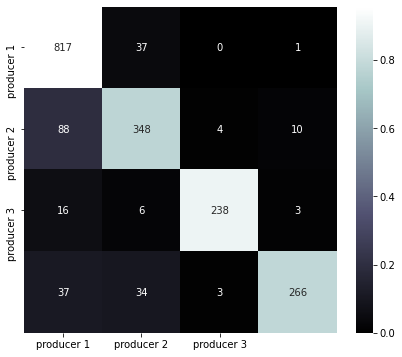

In [33]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)

plot_confusion_matrix(cm, ['producer 1', 'producer 2', 'producer 3'])

# Save Model

In [46]:
pickle.dump(bst, open('../model/xgb-model', 'wb'))

In [47]:
# load model
# model = pickle.load(open('../model/xgb-model', 'rb'))